In [1]:
from aemeasure import read_as_pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
from _utils import quick_plot_setup

quick_plot_setup(use_tex=False)

In [2]:
from pcpptc import PolygonInstance, Solution
from pcpptc.plot import setup_plot, plot_polygon_instance, plot_solution
from pcpptc.plot.polgyon_instance import plot_coverage

In [3]:
read_as_pd("./solutions/2.results.json").columns

Loaded dataframe ./solutions/2.results.json
Executed on: ['algry01' 'algry03']
During: 2021-08-19 14:08:26.172107 and 2021-08-20 11:44:43.387275


Index(['solution', 'coverage', 'touring_cost', 'length', 'turn_sum',
       'instance', 'instance_path', 'runtime', 'timestamp', 'hostname', 'argv',
       'git_revision', 'cwd', 'solver', 'i', 'turn_factor'],
      dtype='object')

In [4]:
tables = []
for f in os.listdir("./solutions"):
    if not f.endswith(".results.json"):
        continue
    f = os.path.join("./solutions", f)
    tables.append(read_as_pd(f))

data = pd.concat(tables, ignore_index=True)
data.dropna(inplace=True)

Loaded dataframe ./solutions/75.results.json
Executed on: ['algry01' 'algry03']
During: 2021-08-19 13:45:51.855705 and 2021-08-20 11:05:19.264670
Loaded dataframe ./solutions/156.results.json
Executed on: ['algry03']
During: 2021-08-19 20:17:54.467402 and 2021-08-19 21:06:58.078076
Loaded dataframe ./solutions/119.results.json
Executed on: ['algry03']
During: 2021-08-19 16:58:32.963196 and 2021-08-19 17:16:04.019680
Loaded dataframe ./solutions/173.results.json
Executed on: ['algry01']
During: 2021-08-19 17:06:12.642626 and 2021-08-19 17:21:29.947470
Loaded dataframe ./solutions/144.results.json
Executed on: ['algry01']
During: 2021-08-19 16:56:09.590524 and 2021-08-19 17:08:05.162376
Loaded dataframe ./solutions/185.results.json
Executed on: ['algry01' 'algry03']
During: 2021-08-19 19:08:39.438329 and 2021-08-20 10:57:15.533061
Loaded dataframe ./solutions/154.results.json
Executed on: ['algry03' 'algry01']
During: 2021-08-19 20:26:45.769972 and 2021-08-20 10:56:57.607183
Loaded dataf

In [5]:
from pcpptc.instance_converter.dmsh import GmshGrid


def rename(s):
    names = {
        "DmshAlgorithm(DmshGrid(full_coverage=True, point_based=False, opt=CVT-full, scale=0.95, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True))": "\u25B3dmsh(95%)",
        "DmshAlgorithm(DmshGrid(full_coverage=True, point_based=False, opt=CVT-full, scale=0.9, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True))": "\u25B3dmsh(90%)",
        "DmshAlgorithm(DmshGrid(full_coverage=True, point_based=False, opt=CVT-full, scale=1.0, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True))": "\u25B3dmsh",
        "GmshAlgorithm(GmshGrid(full_coverage=True, point_based=False, quad=False, alg=1, opt=CVT-full, scale=1.0, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True, hole_workaroundTrue))": f"\u25B3MA",
        "GmshAlgorithm(GmshGrid(full_coverage=True, point_based=False, quad=False, alg=6, opt=CVT-full, scale=1.0, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True, hole_workaroundTrue))": f"\u25B3FD",
        "GmshAlgorithm(GmshGrid(full_coverage=True, point_based=False, quad=False, alg=8, opt=CVT-full, scale=1.0, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True, hole_workaroundTrue))": f"\u25B3FDQ",
        "GmshAlgorithm(GmshGrid(full_coverage=True, point_based=False, quad=False, alg=9, opt=CVT-full, scale=0.95, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True, hole_workaroundTrue))": f"\u25B3PP(95%)",
        "GmshAlgorithm(GmshGrid(full_coverage=True, point_based=False, quad=False, alg=9, opt=CVT-full, scale=0.9, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True, hole_workaroundTrue))": f"\u25B3PP(90%)",
        "GmshAlgorithm(GmshGrid(full_coverage=True, point_based=False, quad=False, alg=9, opt=CVT-full, scale=1.0, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True, hole_workaroundTrue))": f"\u25B3PP",
        "GmshAlgorithm(GmshGrid(full_coverage=True, point_based=False, quad=True, alg=8, opt=CVT-full, scale=1.0, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True, hole_workaroundTrue))": "\u25A1FDQ",
        "GmshAlgorithm(GmshGrid(full_coverage=True, point_based=False, quad=True, alg=9, opt=CVT-full, scale=1.0, buffer=0.05, simplification=0.1, iterations=1000, hard_corners=True, hole_workaroundTrue))": f"\u25A1PP",
    }
    return names.get(s, s)


data["solver"] = data["solver"].apply(rename)

In [6]:
data["type"] = data["solver"].apply(lambda s: "hex" if "Hex" in s else "square")
data["point_based"] = data["solver"].apply(lambda s: "pb=True" in s)

In [7]:
instance_paths = list(data["instance_path"].unique())
instances = [PolygonInstance.from_json(file_path=f) for f in instance_paths]
instance_areas = pd.DataFrame(
    data={"area": [i.original_area.area for i in instances]}, index=instance_paths
)
data = data.merge(instance_areas, left_on="instance_path", right_index=True)

In [8]:
t_ = data.groupby("instance")[["touring_cost"]].min()
data = data.merge(t_, left_on="instance", right_index=True, suffixes=("", "_min"))
data["relative_cost"] = 100 * ((data["touring_cost"] / data["touring_cost_min"]) - 1)
data["relative_coverage"] = 100 * data["coverage"] / data["area"]
data["type"] = data["solver"].apply(lambda s: s[0])

In [9]:
data.sort_values(["solver"], inplace=True, ascending=True)
data.sort_values(["type"], inplace=True, ascending=True, kind="stable")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


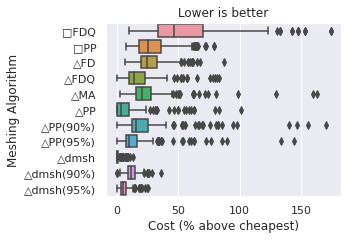

In [10]:
plt.figure(figsize=(5, 3.5))
plt.title("Lower is better")
sns.boxplot(data=data, y="solver", x="relative_cost", orient="h")
plt.xlabel("Cost (% above cheapest)")
plt.ylabel("Meshing Algorithm")
plt.tight_layout()
plt.savefig("10_cost.pdf")
plt.show()

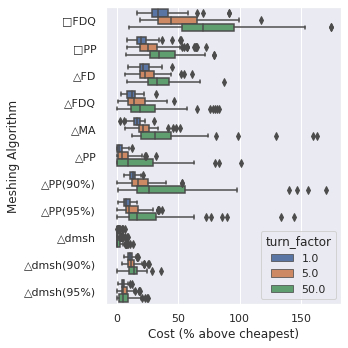

In [11]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, y="solver", x="relative_cost", orient="h", hue="turn_factor")
plt.xlabel("Cost (% above cheapest)")
plt.ylabel("Meshing Algorithm")
plt.tight_layout()
plt.show()

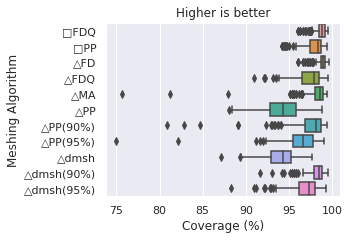

In [12]:
plt.figure(figsize=(5, 3.5))
plt.title("Higher is better")
sns.boxplot(data=data, y="solver", x="relative_coverage", orient="h")
plt.xlabel("Coverage (%)")
plt.ylabel("Meshing Algorithm")

plt.tight_layout()
plt.savefig("10_coverage.pdf")
plt.show()

In [13]:
data.groupby(["solver"])["relative_coverage"].mean()

solver
□FDQ          98.693730
□PP           97.965203
△FD           98.827010
△FDQ          97.398205
△MA           98.097834
△PP           94.133489
△PP(90%)      97.393603
△PP(95%)      96.241847
△dmsh         94.030535
△dmsh(90%)    98.232007
△dmsh(95%)    96.862393
Name: relative_coverage, dtype: float64

In [14]:
t_ = data.dropna()
t_ = t_.groupby(["solver"])["instance"].nunique()
t_

solver
□FDQ          199
□PP           199
△FD           199
△FDQ          199
△MA           199
△PP           199
△PP(90%)      199
△PP(95%)      199
△dmsh         194
△dmsh(90%)    194
△dmsh(95%)    193
Name: instance, dtype: int64

In [15]:
t = data.groupby(["solver"])["runtime"].mean().reset_index()
t["solver"] = t["solver"].apply(lambda s: s.replace("□", "$\\square$"))
t["solver"] = t["solver"].apply(lambda s: s.replace("△", "$\\Delta$"))
t["solver"] = t["solver"].apply(lambda s: s.replace("%", "\\%"))
for i, t in t.iterrows():
    print(t["solver"], "&", round(t["runtime"], 1), "\\\\")

$\square$FDQ & 129.7 \\
$\square$PP & 89.5 \\
$\Delta$FD & 137.6 \\
$\Delta$FDQ & 113.1 \\
$\Delta$MA & 120.7 \\
$\Delta$PP & 94.1 \\
$\Delta$PP(90\%) & 127.4 \\
$\Delta$PP(95\%) & 106.6 \\
$\Delta$dmsh & 114.6 \\
$\Delta$dmsh(90\%) & 146.2 \\
$\Delta$dmsh(95\%) & 123.3 \\
